In [10]:
import os, time, itertools
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import input_data
import cv2
import math
import random
import os
from tensorflow.python.framework import ops
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.gridspec as gridspec
from IPython.display import Image, display

In [11]:
tf.reset_default_graph()

In [17]:

data="/media/dheeraj/9A26F0CB26F0AA01/WORK/jupyter_files/kagglecatsanddogs_3367a/PetImages"
Categories=["Dog", "Cat"]


In [18]:
img_size= 200


In [20]:
training_data=[]
def create_training_data():
    for category in Categories:
    
        # here we need to join the path of the directories of dogs and cats together
        path=os.path.join(data, category)

        #here we create catogories for the classes for comparison
        class_num=Categories.index(category)

        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path, img),0)  
                new_images=cv2.resize(img_array, (img_size, img_size))  # size of image is 100*100
                training_data.append([new_images, class_num])
                #print(class_num)
            except Exception as e:
                pass

create_training_data()      


KeyboardInterrupt: 

In [21]:

print(len(training_data))
print(np.shape(training_data))
print(np.shape(training_data[0]))

1506
(1506, 2)
(2,)


(1506, 200, 200)
(1506,)


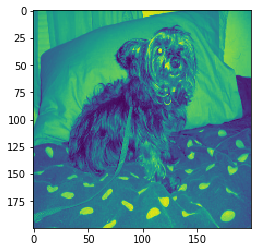

In [22]:
xx=[]
yy=[]

for features, label in training_data:
    xx.append(features)
    yy.append(label)
plt.imshow(xx[0])

#print(yy)

xx = np.array(xx)
print(xx.shape)
print(np.shape(yy))
#print(x_main.shape)

In [23]:
a=(xx.shape[0])
i=np.random.permutation(a)
#x_train=x_main[i]
#print(x_train.shape)

x_train = xx[i]
print(" the shape of x_train is : {}".format(x_train.shape))
x_train = x_train.reshape([-1, img_size * img_size])
print("The new shape  of x_train is : {}".format(x_train.shape))

 the shape of x_train is : (1506, 200, 200)
The new shape  of x_train is : (1506, 40000)


In [24]:
#normalising the data by dividing it by the maximum value of pixel

#x_train = x_train/255.0
totsize = len(training_data)
print(totsize)

1506


In [2]:
def generator(x, isTrain = True, reuse = tf.AUTO_REUSE):
    with tf.variable_scope('generator', reuse= reuse):
        
        conv1 = tf.layers.conv2d_transpose(x, 1024, [4,4], strides = (1,1), padding = 'valid')
        lrelu1 = lrelu(tf.layers.batch_normalization(conv1, training = isTrain), 0.2)
        
        conv2 = tf.layers.conv2d_transpose(lrelu1, 512, [4,4], strides = (2,2), padding = 'same')
        lrelu2 = lrelu(tf.layers.batch_normalization(conv2, training= isTrain), 0.2)
        
        conv3 = tf.layers.conv2d_transpose(lrelu2, 256, [4,4], strides = (2,2), padding = 'same')
        lrelu3 = lrelu(tf.layers.batch_normalization(conv3, training = isTrain), 0.2)
        
        conv4 = tf.layers.conv2d_transpose(lrelu3, 128, [4,4], strides = (2,2), padding = 'same')
        lrelu4 = lrelu(tf.layers.batch_normalization(conv4, training = isTrain), 0.2)
        
        conv5 = tf.layers.conv2d_transpose(lrelu4, 1, [4,4], strides = (2,2), padding = 'same')
        outputs = tf.nn.tanh(conv5)
        
        return outputs
    
def discriminator (x, isTrain = True, reuse = tf.AUTO_REUSE):
    with tf.variable_scope('discriminator', reuse = reuse):
        
        conv1 = tf.layers.conv2d(x, 128, [4,4], strides = (2,2), padding = 'same')
        lrelu1 = lrelu(conv1, 0.2)
        
        conv2 = tf.layers.conv2d(lrelu1, 256, [4,4], strides = (2,2), padding = 'same')
        lrelu2 = lrelu(tf.layers.batch_normalization(conv2, training = isTrain), 0.2)
        
        conv3 = tf.layers.conv2d(lrelu2, 512, [4,4], strides = (2,2), padding = 'same')
        lrelu3 = lrelu(tf.layers.batch_normalization(conv3, training = isTrain), 0.2)
        
        conv4 = tf.layers.conv2d(lrelu3, 1024, [4,4], strides = (2,2), padding = 'same')
        lrelu4 = lrelu(tf.layers.batch_normalization(conv4, training = isTrain), 0.2)
        
        conv5 = tf.layers.conv2d(lrelu4, 1, [4,4], strides = (1,1), padding = 'valid')
        outputs = tf.nn.sigmoid(conv5)
        
        return outputs, conv5
    

In [3]:
def lrelu(x, th = 0.2):
    return tf.maximum(th*x, x)

def sampleZ(batch_size):
    return np.random.normal(0, 1, (batch_size, 1, 1, 100))

def show_images(images):
    images = np.reshape(images, [images.shape[0], -1])
    sqrt_n = int(np.ceil(np.sqrt(images.shape[0])))
    sqrt_img = int(np.ceil(np.sqrt(images.shape[1])))
    
    fig = plt.figure(figsize = (sqrt_n, sqrt_n))
    gs = gridspec.Gridspec(sqrt_n, sqrt_n)
    gs.update(wspace = 0.05, hspace = 0.05)
    
    for i, img in enumerate(images):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_aspect('equal')
        pl.imshow(img.reshape([sqrt_img, sqrt_img]))
        
    return
        

In [4]:
x = tf.placeholder(tf.float32, shape = (None, img_size, img_size, 1))
z = tf.placeholder(tf.float32, shape = (None,1, 1, 100))
isTrain = tf.placeholder(dtype = tf.bool)
batch_size = 100

In [5]:
G_z = generator(z, isTrain)


In [6]:
D_real, D_real_logits = discriminator(x, isTrain)
D_fake, D_fake_logits = discriminator(G_z, isTrain, reuse = True)

D_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = D_real_logits, 
                                                                    labels = tf.ones([batch_size, 1, 1, 1])))

D_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = D_fake_logits, 
                                                                    labels = tf.zeros([batch_size, 1, 1, 1])))

D_loss = D_loss_real + D_loss_fake

G_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = D_fake_logits, 
                                                               labels = tf.ones([batch_size, 1, 1,1])))


In [7]:
D_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'discriminator')
G_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, 'generator')

D_solver = tf.train.AdamOptimizer(learning_rate = 0.0002, beta1 = 0.5).minimize(D_loss, var_list = D_vars)
G_solver = tf.train.AdamOptimizer(learning_rate = 0.0002, beta1 = 0.5).minimize(G_loss, var_list = G_vars)


In [8]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()